<a id="topo"></a>
# Matplotlib
(documentação oficial: https://matplotlib.org/3.1.0/contents.html)

<img src='img/matplotlib.png' width=400>

- <a href="#1">Introdução</a>
- <a href="#2">Gráficos Simples</a>
- <a href="#3">Figuras, Subgráficos, Eixos e Marcas de Eixo (ticks)</a>
- <a href="#4">Outros tipos de Gráficos</a> 
- <a href="#5">Depois dessa Introdução...</a>
- <a href="#6">Referências Rápidas</a>

<a id="1"></a>
## Introdução
Matplotlib é uma excelente biblioteca para traçado de gráficos de dados científicos em 2D e 3D. Algumas vantagens desta biblioteca:
- Facilidade de uso e apresentação de dados em forma gráfica;
- Tem suporte a etiquetas e textos formatados em LaTeX;
- Pode-se controlar todos os elementos da figura, incluindo tamanho e DPI ;
- Saída de alta qualidade em vários formatos, incluindo PNG, PDF, SVG, EPS; 
- GUI para explorar figuras de modo interativo, e suporte à geração de arquivos de figuras sem cabeçalhos (útil para trabalhos com scripts de lotes de comandos - batch). 

Uma das principais características do pacote **Matplotlib** é que todos os aspectos da figura podem ser controlados via programação (ou seja, sem precisar usar a GUI). Isso é importante para a reprodutibilidade, e conveniente quando é necessário gerar novamente a figura com dados atualizados ou alterar sua aparência. 

Visite a [Galeria de Gráficos](http://matplotlib.org/gallery.html) para ver uma diversidade de gráficos gerados por essa biblioteca.

O **Matplotlib** é incluído automaticamente como parte do espaço de nomes do **pylab** interativo, mas se você precisar importá-lo em seu próprio _namespace_ (por exemplo, num _script_ ou módulo não interativo),  assim como usamos a abreviação `np` para **NumPy** e `pd` para **Pandas**, usaremos a abreviação costumeira, `plt`, para a importação do pacote **Matplotlib**.

### Série de Fibonacci 
Modelo para criação de coelhos a partir de um casal desses animais.

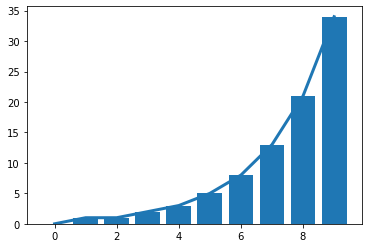

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def fibonacci(n):
  seq = np.zeros(n)
  seq[1] = 1
  for i in range(2,n):
    seq[i] = seq[i-1] + seq[i-2]
  return seq

plt.plot(fibonacci(10),lw=3)
plt.bar(range(10),fibonacci(10))
plt.show()

Podemos usar uma célula mágica para dizer ao *Jupyter* que queremos ver os gráficos no próprio notebook (*inline*).

In [2]:
%matplotlib inline

Podemos capturar a saída de um comando mágico e atribuí-la a uma variável, tal como:

In [6]:
%load_ext sql
%sql sqlite://

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [7]:
%%sql
DROP TABLE IF EXISTS futebol;
CREATE TABLE futebol ("Time","Brasileiro","Copa do Brasil","Supercopa","Libertadores","Sulamericana");
INSERT INTO futebol VALUES ("Flamengo",6,3,3,2,1);
INSERT INTO futebol VALUES ("São Paulo",6,0,0,3,3);
INSERT INTO futebol VALUES ("Santos",8,1,0,3,1);
INSERT INTO futebol VALUES ("Cruzeiro",4,6,0,2,2);

 * sqlite://
Done.
Done.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.


[]

 * sqlite://
Done.


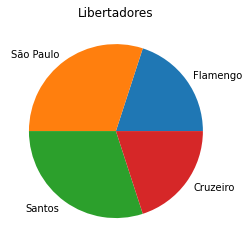

In [12]:
campeoes = %sql SELECT "Time","Libertadores" FROM futebol
campeoes.pie();

#### Suprimindo a Saída Final de uma Função

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
x = np.linspace(0, 1, 1000)**1.5

(array([216., 126., 106.,  95.,  87.,  81.,  77.,  73.,  71.,  68.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

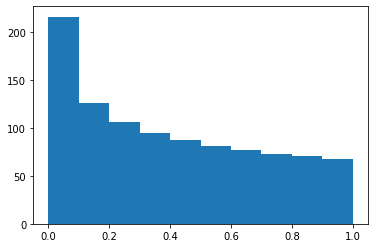

In [6]:
# Nessa célula você verá a saída da função plt.hist(x)
plt.hist(x)

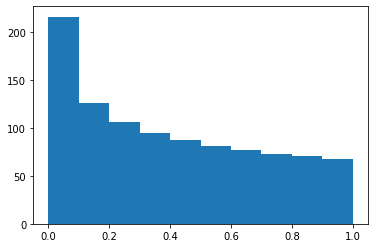

In [7]:
# acrescentando um ponto e vírgula ao final da linha, a saída da função é suprimida.
plt.hist(x);

### Interpolação usando Polinômio

       6         5        4         3         2
9.143 x - 18.29 x + 6.13 x + 8.793 x - 7.729 x + 1.461 x + 1.16


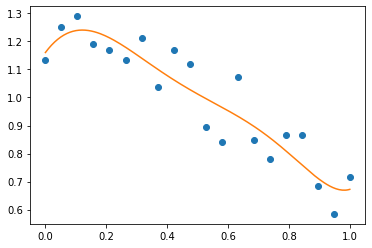

In [8]:
x = np.linspace(0, 1, 20)
y = np.cos(x) + 0.3 * np.rabndom.rand(20)
p = np.poly1d(np.polyfit(x, y, 6))
print(p)
t = np.linspace(0, 1, 200)
plt.plot(x, y, 'o', t, p(t), '-')
plt.show()

        3         2
0.9612 x - 1.828 x + 0.338 x + 1.197


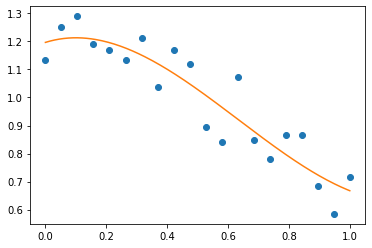

In [9]:
p = np.poly1d(np.polyfit(x, y, 3))
print(p)
t = np.linspace(0, 1, 200)
plt.plot(x, y, 'o', t, p(t), '-')
plt.show()

### Subpacote Pyplot
Ele fornece uma interface de procedimentos e rotinas para a biblioteca de plotagem orientada a objetos, **Matplotlib**. Ele é modelado para imitar os comandos gráficos do Matlab™. A maioria dos comandos em `pyplot` possui argumentos semelhantes e análogos aos do Matlab™. 

### Interatividade
Formulários com interatividade podem ser realizados com *widgets* disponíveis no pacote **ipywidgets**:

In [34]:
from ipywidgets import interact
@interact                                                 # decorador
def eco(input="IFG Campus Goiânia ",times=[1,2,3,4,5]):   # função a ser usada interativamente
    return (input)*times

interactive(children=(Text(value='IFG Campus Goiânia ', description='input'), Dropdown(description='times', op…

In [35]:
from ipywidgets import interact
interact(eco,input="Ok? ",times=(1,15,1));

interactive(children=(Text(value='Ok? ', description='input'), IntSlider(value=8, description='times', max=15,…

In [36]:
from ipywidgets import interact
interact(eco,input="Ok? ",times=5);

interactive(children=(Text(value='Ok? ', description='input'), IntSlider(value=5, description='times', max=15,…

In [37]:
from ipywidgets import IntSlider
interact(eco,input="Olá! ",times=IntSlider(min=0, max=15, step=1, value=1));

interactive(children=(Text(value='Olá! ', description='input'), IntSlider(value=1, description='times', max=15…

In [38]:
import matplotlib.pyplot as plt
@interact
def polinomio(Vida=IntSlider(min=0, max=100, step=10, value=50)):
    plt.pie([Vida/100., 1.0-Vida/100.],labels=['Yang','Ying'])

interactive(children=(IntSlider(value=50, description='Vida', step=10), Output()), _dom_classes=('widget-inter…

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive

def reta(m, b):
    '''Traça uma reta com coeficiente angular 'm' e coeficiente linear 'b' '''
    plt.figure(2,figsize=(8,5))
    plt.plot([-10,10],[0,0],'k'); plt.plot([0,0],[-10,10],'k')    # eixos 'x' e 'y'
    x = np.linspace(-10, 10, num=1000)                            # intervalo de valores de 'x'
    plt.plot(x, m * x + b, linewidth=3); plt.ylim(-10, 10)
    plt.grid(True); plt.title('Reta'); plt.xlabel('x'); plt.ylabel('y'); plt.plot(0,b,'ro')
    if b >= 0:    
        st = "y = %.1f x + %.1f"   # equação da reta
        if m >= 0:                 # 4o. quadrante
            xt, yt = 5, -7.5       # coordenadas do texto
        else:                      # 3o. quadrante
            xt, yt = -7.5, -7.5    # coordenadas do texto
    else:
        st = "y = %.1f x - %.1f"   # equação da reta
        if m >= 0:                 # 2o. quadrante
            xt, yt = -7.5, 7.5     # coordenadas do texto
        else:                      # 1o. quadrante
            xt, yt = 5, 7.5        # coordenadas do texto
    plt.text(xt,yt,st % (m,abs(b)),fontsize=12,weight='bold')
    plt.show()

interactive_plot = interactive(reta, m=(-5.0, 5.0), b=(-7.5, 7.5, 0.5))
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='m', max=5.0, min=-5.0), FloatSlider(value=0.0, descr…

<p style="text-align:right;">>>>>> <a href="#topo">Volta ao topo</a>

<a id="2"></a>
## Gráficos Simples
Vamos plotar as funções seno e cosseno num mesmo plano cartesiano. A partir das configurações padrão, iremos enriquecer o gráfico, passo a passo, para torná-lo mais apresentável. O primeiro passo é a obtenção das coordenadas dos pontos (dados):

```python
import numpy as np
x = np.linspace(-np.pi, np.pi, 256) 	# abscissas
s, c = np.sin(x), np.cos(x)			    # ordenadas
```

O **Matplotlib** vem com um conjunto de configurações que permitem personalizar várias características do gráfico: tamanho/dpi da figura, largura/cor/estilo da linha, propriedades de eixo/grade, propriedades de texto/fonte etc.


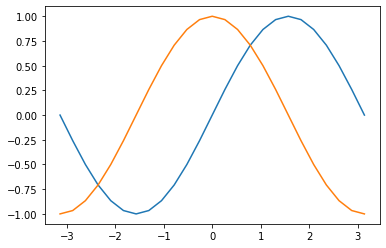

In [14]:
x = np.linspace(-np.pi, np.pi, 25) 
s, c = np.sin(x), np.cos(x)

plt.plot(x, s)
plt.plot(x, c)
plt.show()

### Mudando Cores e Largura das Linhas
Vamos traçar a curva do cosseno em azul e do seno em vermelho, e ambas com linhas ligeiramente mais grossas. Nós também vamos alterar um pouco o tamanho da figura para torná-la mais horizontal.

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

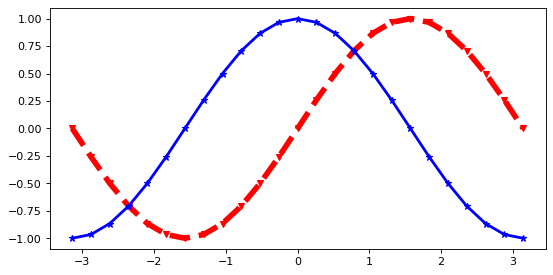

In [16]:
plt.figure(figsize=(8, 4), dpi=80)
plt.plot(x, s, color="red",  linewidth=5, linestyle="--", marker='v')
plt.plot(x, c, color="blue", linewidth=2.5, linestyle="-", marker='*')
help(plt.plot)

### Ajustando Limites dos Eixos
Os limites atuais do primeiro gráfico (configuração padrão) são um pouco apertados e queremos criar algum espaço para ver claramente os pontos de dados.

(-1.25, 1.25)

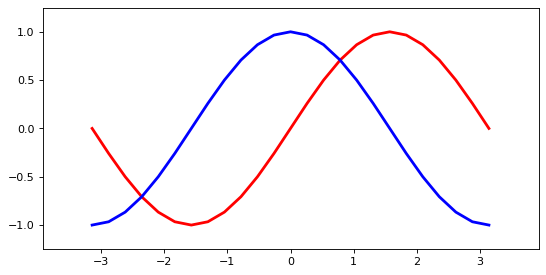

In [17]:
plt.figure(figsize=(8, 4), dpi=80)
plt.plot(x, s, color="red",  linewidth=2.5, linestyle="-")
plt.plot(x, c, color="blue", linewidth=2.5, linestyle="-")
plt.xlim(x.min()*1.25, x.max()*1.25)
plt.ylim(s.min()*1.25, s.max()*1.25) 

<p style="text-align:right;">>>>>> <a href="#topo">Volta ao topo</a>

<a id="3"></a>
## Figuras, Subgráficos, Eixos e Marcas de Eixo (ticks)
### Mudando as Marcas dos Eixos (_ticks_) 
Os ticks padrões não são ideais porque eles não mostram valores interessantes, tais como ±π, ±π/2, para as funções seno e cosseno. Vamos mudá-los de modo a mostrar apenas esses valores.

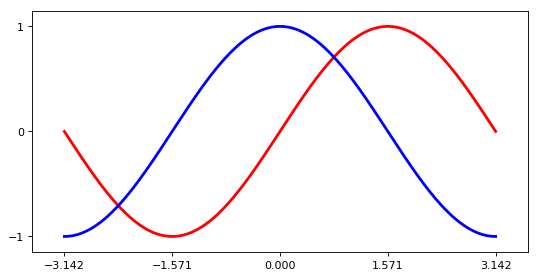

In [15]:
plt.figure(figsize=(8, 4), dpi=80)
plt.plot(x, s, color="red",  linewidth=2.5, linestyle="-"); plt.plot(x, c, color="blue", linewidth=2.5, linestyle="-")
plt.xlim(x.min()*1.15, x.max()*1.15); plt.ylim(s.min()*1.15, s.max()*1.15) 
pi = np.pi
plt.xticks([-pi, -pi/2, 0, pi/2, pi])
plt.yticks([-1, 0, +1])
plt.show()

### Mudando os Rótulos (_labels_) das Marcas
Os _ticks_ padrões não são ideais porque eles não mostram valores interessantes, tais como ±π, ±π/2, para as funções seno e cosseno. Vamos mudá-los de modo a mostrar apenas esses valores.

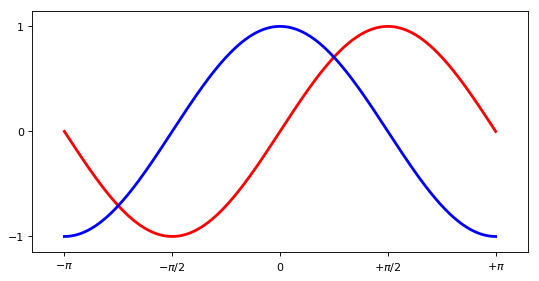

In [9]:
plt.figure(figsize=(8, 4), dpi=80, frameon=False)
plt.plot(x, s, color="red",  linewidth=2.5, linestyle="-"); 
plt.plot(x, c, color="blue", linewidth=2.5, linestyle="-")
plt.xlim(x.min()*1.15, x.max()*1.15); 
plt.ylim(s.min()*1.15, s.max()*1.15) 
pi = np.pi
r = [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$']       # rótulos
plt.xticks([-pi, -pi/2, 0, pi/2, pi], r); plt.yticks([-1, 0, +1])
plt.show()

### Traçando Eixos Horizontal e Vertical (_spines_)
Os eixos são linhas que conectam as marcas da origem até os limites da área de dados. Eles podem ser colocados em posições arbitrárias e por padrão, aparecem nas fronteiras da figura. Vamos colocá-los no meio do gráfico. Como há quatro deles (superior/inferior/esquerda/direita), descartamos a parte superior e a direita, definindo a cor deles como `none` (nenhuma). Movemos a parte inferior e a esquerda para a origem nas coordenadas do espaço de dados.

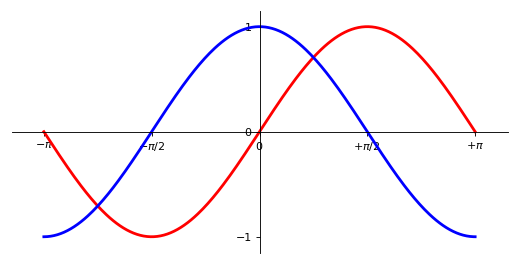

In [23]:
plt.figure(figsize=(8, 4), dpi=80)
plt.plot(x, s, color="red",  linewidth=2.5, linestyle="-"); 
plt.plot(x, c, color="blue", linewidth=2.5, linestyle="-")
plt.xlim(x.min()*1.15, x.max()*1.15); 
plt.ylim(s.min()*1.15, s.max()*1.15) 
pi = np.pi; 
r = [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$']       # rótulos
plt.xticks([-pi, -pi/2, 0, pi/2, pi], r); plt.yticks([-1, 0, +1])

ax = plt.gca()                         # gca é a abreviação para 'get current axis'
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.show()

### Acrescentando Legenda
Vamos inserir uma legenda para identificar cada uma das linhas (funções) traçadas. A legenda deverá ser colocada no canto superior esquerdo. Basta ajustar o parâmetro `label` (que será usado na caixa de legendas) aos comandos de plotagem.

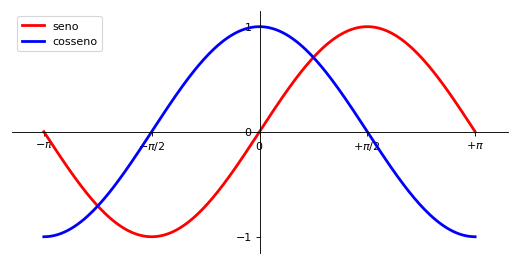

In [24]:
plt.figure(figsize=(8, 4), dpi=80)

plt.plot(x, s, color="red",  linewidth=2.5, linestyle="-", label="seno")
plt.plot(x, c, color="blue", linewidth=2.5, linestyle="-", label="cosseno")
plt.xlim(x.min()*1.15, x.max()*1.15); plt.ylim(s.min()*1.15, s.max()*1.15) 
pi = np.pi; r = [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$']       # rótulos
plt.xticks([-pi, -pi/2, 0, pi/2, pi], r); plt.yticks([-1, 0, +1])

ax = plt.gca()                         # gca é a abreviação para 'get current axis'
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.legend(loc='upper left')

plt.show()

### Comentando alguns pontos no gráfico
Vamos anotações em alguns pontos interessantes com o comando `annotate`. Escolhemos o valor $2\pi/3$ para comentar, tanto na função seno como na cosseno. Primeiro, desenhamos um marcador na curva e depois uma linha pontilhada. Em seguida, usamos o comando de anotação para exibir um texto com uma seta.

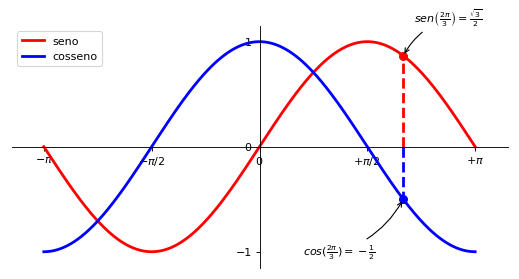

In [8]:
plt.figure(figsize=(8, 4), dpi=80)

plt.plot(x, s, color="red",  linewidth=2.5, linestyle="-", label="seno")
plt.plot(x, c, color="blue", linewidth=2.5, linestyle="-", label="cosseno")
plt.xlim(x.min()*1.15, x.max()*1.15); plt.ylim(s.min()*1.15, s.max()*1.15) 
pi = np.pi; r = [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$']       # rótulos
plt.xticks([-pi, -pi/2, 0, pi/2, pi], r); plt.yticks([-1, 0, +1])

ax = plt.gca()                         # gca é a abreviação para 'get current axis'
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.legend(loc='upper left')

t = 2*np.pi/3
plt.plot([t,t], [0,np.cos(t)], color='blue', linewidth=2.5, linestyle="--")   # reta tracejada, azul
plt.scatter([t,], [np.cos(t),], 50, color='blue')                             # ponto azul sobre a curva

plt.annotate(r'$sen\left(\frac{2\pi}{3}\right)=\frac{\sqrt{3}}{2}$',
             xy=(t, np.sin(t)), xycoords='data',
             xytext=(+10, +30), textcoords='offset points', fontsize=10,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2")) # anotação: sen(2pi/3)=sqrt(3)/2

plt.plot([t, t],[0, np.sin(t)], color='red', linewidth=2.5, linestyle="--")   # reta tracejada, vermelha
plt.scatter([t, ],[np.sin(t), ], 50, color='red')                             # ponto vermelho sobre a curva

plt.annotate(r'$cos(\frac{2\pi}{3})=-\frac{1}{2}$',
             xy=(t, np.cos(t)), xycoords='data',
             xytext=(-90, -50), textcoords='offset points', fontsize=10,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2")) # anotação: cos(2pi/3)=-1/2

plt.show()

### Atenção aos Detalhes
Os rótulos das marcas ficaram pouco visíveis (sobrepostos) por causa das linhas azul e vermelha. Podemos aumentá-las e também podemos ajustar suas propriedades de modo que elas sejam renderizadas em um plano de fundo branco semitransparente. Isso nos permitirá ver os dados e os rótulos.

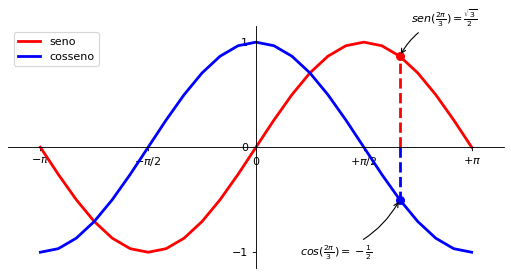

In [18]:
plt.figure(figsize=(8, 4), dpi=80)

plt.plot(x, s, color="red",  linewidth=2.5, linestyle="-", label="seno")
plt.plot(x, c, color="blue", linewidth=2.5, linestyle="-", label="cosseno")
plt.xlim(x.min()*1.15, x.max()*1.15); plt.ylim(s.min()*1.15, s.max()*1.15) 
pi = np.pi; r = [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$']       # rótulos
plt.xticks([-pi, -pi/2, 0, pi/2, pi], r); plt.yticks([-1, 0, +1])

ax = plt.gca()                         # gca é a abreviação para 'get current axis'
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.legend(loc='upper left')

t = 2*np.pi/3
plt.plot([t,t], [0,np.cos(t)], color='blue', linewidth=2.5, linestyle="--")   # reta tracejada, azul
plt.scatter([t,], [np.cos(t),], 50, color='blue')                             # ponto azul sobre a curva

plt.annotate(r'$sen(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$',
             xy=(t, np.sin(t)), xycoords='data',
             xytext=(+10, +30), textcoords='offset points', fontsize=10,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2")) # anotação: sen(2pi/3)=sqrt(3)/2

plt.plot([t, t],[0, np.sin(t)], color='red', linewidth=2.5, linestyle="--")   # reta tracejada, vermelha
plt.scatter([t, ],[np.sin(t), ], 50, color='red')                             # ponto vermelho sobre a curva

plt.annotate(r'$cos(\frac{2\pi}{3})=-\frac{1}{2}$',
             xy=(t, np.cos(t)), xycoords='data',
             xytext=(-90, -50), textcoords='offset points', fontsize=10,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2")) # anotação: cos(2pi/3)=-1/2

for rotulo in ax.get_xticklabels() + ax.get_yticklabels():
    rotulo.set_fontsize(10)
    rotulo.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.65))

plt.show()

<img src='img/sencos.png' alt='Funções seno e cosseno' style="float:right;width:600px;height:350px;">Imagem gerada pelo mesmo código no ambiente WinPython:

### Figuras e Subgráficos
Uma “figura” no **matplotlib** é toda a janela apresentada na interface com o usuário. Dentro dessa figura pode haver subgráficos (_subplots_).  Até agora usamos figura e criação de eixos implícitas à função `plot()`. Isso é útil nas plotagens mais simples e/ou rápidas. 

Podemos ter mais controle sobre a exibição dos sinais usando as funções `figure()`, `subplot()` e `axes()` explicitamente. Enquanto a função `subplot()` posiciona os gráficos numa grade regular, a função `axes()` permite a colocação livre do gráfico dentro da figura. 

Já trabalhamos com figuras e subgráficos, sem chamá-los explicitamente. Quando usamos `plot()`, o **matplotlib** chama o método `gca()` para obter os eixos atuais, e `gca()` chama `gcf()` (_get current figure_) para obter a figura atual. Se não existir nenhuma figura corrente, ela chama a função `figure()` para criar uma, fazendo uso de um subgráfico: `subplot(111)`. 

#### Figuras
Uma figura nada mais é que a própria janela na GUI, com título “Figure #”. As figuras são numeradas a partir de 1, em oposição ao modo natural do Python, que seria a partir de 0. Isso mostra claramente o estilo Matlab. Existem vários parâmetros que determinam o aspecto da figura:

|     Parâmetro     	|         Default        	|     Descrição                                           	|
|:-----------------:	|:----------------------:	|---------------------------------------------------------	|
|        num        	|            1           	|    Número da figura                                     	|
|      figsize      	|     figure.figsize     	|    Tamanho da figura em polegadas: (largura, altura)    	|
|        dpi        	|       figure.dpi       	|    Resolução em pontos por polegada (dpi)               	|
|     facecolor     	|    figure.facecolor    	|    Cor do fundo do desenho                              	|
|     edgecolor     	|    figure.edgecolor    	|    Cor da borda em volta do fundo do desenho            	|
|    frameon        	|    True                	|    Desenha o quadro da figura ou não                    	|

Assim como acontece com outros objetos, pode-se definir propriedades de figura usando `setp()` ou com os métodos da classe: **set_algumapropriedade**. Quando você trabalha com a GUI, você pode fechar uma figura clicando no ícone [x], no canto superior direito da janela. Mas você pode fechar uma figura programaticamente chamando o método `close()`. Dependendo do argumento, ele fecha: 
1. A figura atual (sem argumento); 
2. Uma figura específica (número da figura como argumento); ou 
3. Todas as figuras ("all" como argumento).
```python
plt.close(1)     # fecha a figura 1
```

#### Subplots
Com a função `subplot()` pode-se organizar os gráficos numa matriz regular de gráficos. Você deve informar o número de linhas e de colunas de gráficos, e a posição do próximo gráfico a ser plotado. Observe que a função `gridspec()` é uma alternativa mais poderosa.

<img src='img/subplots.png' alt='Imagens de Subgráficos' style="width:600px">


#### Eixos
Os eixos são semelhantes aos subgráficos, mas permitem a colocação de gráficos em qualquer local na figura. Então, se quisermos colocar um gráfico menor dentro de um maior, fazemos isso com a função `axes()`.

#### Marcas nos Eixos (_ticks_)
Marcas bem formatadas são importantes nas figuras prontas para uma publicação. O **Matplotlib** fornece um sistema totalmente configurável para marcas. Existem localizadores de marcas para especificar onde as marcas devem aparecer e formatadores de marcas para se conseguir a aparência desejada. Marcas maiores e menores podem ser locadas e formatadas independentemente uma da outra. Por padrão, os _ticks_ secundários não são mostrados, ou seja, há apenas uma lista vazia para eles: **NullLocator**.

Os localizadores de _ticks_ controlam as posições das marcas e são definidos da seguinte maneira:
```python
ax = plt.gca()
ax.xaxis.set_major_locator(eval(locator))
```
<img src='img/localizadores.png' alt='Imagem de localizadores de marcas dos gráficos.' style='width:600px'>

Todos esses localizadores derivam da classe mãe **matplotlib.ticker.Locator**. Você pode fazer seu próprio localizador derivando dessa classe. Lidar com datas como marcas pode ser especialmente complicado e por isso, o **matplotlib** fornece localizadores especiais em **matplotlib.dates**.

<p style="text-align:right;">>>>>> <a href="#topo">Volta ao topo</a>

<a id="4"></a>
## Outros tipos de Gráficos
<img src='img/preenchidos.png' alt='Imagem de gráficos de senóides preenchidas.' style='float:right;width:400px'>

### Área preenchida

A partir do código mostrado a seguir, tente reproduzir o gráfico à direita, com áreas preenchidas.  

<u>Dica</u>: Use o método `fill_between(x,y1,y2=0, where=None,interpolate=False,step=None, data=None)` para preencher a área horizontal entre duas curvas definidas pelos pontos $(x, y1)$ e $(x, y2)$; isso cria um ou vários polígonos para descrever a área preenchida; pode-se excluir algumas seções horizontais do preenchimento usando o parâmetro `where`.
```python

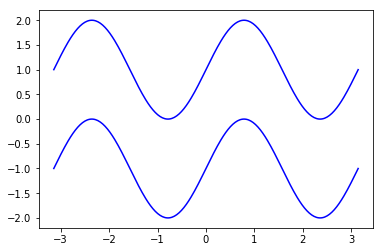

In [10]:
n = 256
X = np.linspace(-np.pi, np.pi, n, endpoint=True)
Y = np.sin(2*X)
plt.plot(X, Y+1, color='blue', alpha=1.00)
plt.plot(X, Y-1, color='blue', alpha=1.00)
#```

<img src='img/dispersao.png' alt='Imagem de gráficos de dispersão.' style='float:right;width:400px'>

### Dispersão

A partir do código mostrado a seguir, tente reproduzir o gráfico à direita.  

<u>Dica</u>: A cor é dada pelo ângulo entre (X, Y).
```python
n = 1024
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)
plt.scatter(X,Y)
```

<img src='img/barras.png' alt='Imagem de gráficos de barras.' style='float:right;width:400px'>

### Barras 
Começando pelo código seguinte, tente reproduzir o gráfico à direita adicionando rótulos às barras vermelhas.

```python
n = 12; X = np.arange(n)
Y1 = (1-X/float(n))*np.random.uniform(0.5,1.0,n)
Y2 = (1-X/float(n))*np.random.uniform(0.5,1.0,n)

plt.bar(X, Y1, facecolor='#9999ff', edgecolor='white')
plt.bar(X,-Y2, facecolor='#ff9999', edgecolor='white')
for x, y in zip(X, Y1):
    plt.text(x, y+0.05, '%.2f' % y, ha='center', va='bottom')
plt.ylim(-1.25, +1.25); plt.show()
```

<img src='img/contornos.png' alt='Imagem de gráficos de contorno.' style='float:right;width:400px'>

### Contornos
A partir do código seguinte, tente reproduzir o gráfico à direita, cuidando do mapa de cores (_Colormaps_).  
<u>Dica</u>: Use o comando `clabel`. 
```python
def f(x, y):
    return (1-x/2+x**5+y**3) * np.exp(-x**2-y**2)

n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
X, Y = np.meshgrid(x, y)

plt.contourf(X, Y, f(X, Y), 8, alpha=.75, cmap='jet')
C = plt.contour(X, Y, f(X, Y), 8, colors='black', linewidth=.5)
plt.show()
```

<img src='img/imagem.png' alt='Imagem desfocada.' style='float:right;width:400px'>

### Imagem
A partir do código seguinte, tente reproduzir o gráfico à direita, cuidando do mapa de cores, da interpolação de imagens e da origem.  
<u>Dica</u>: Cuide da origem da imagem no comando `imshow()` e use uma barra de cores. 
```python
def f(x, y):
    return (1-x/2+x**5+y**3) * np.exp(-x**2-y**2)

n = 10
x = np.linspace(-3, 3, 4 * n)
y = np.linspace(-3, 3, 3 * n)
X, Y = np.meshgrid(x, y)
plt.imshow(f(X, Y))
plt.show()
```

<img src='img/torta.png' alt='Imagem de gráficos de pizza.' style='float:right;width:400px'>

### Torta
A partir do código seguinte, tente reproduzir o gráfico à direita, cuidando das cores e do tamanho das fatias.  
<u>Dica</u>: Modifique a var. Z.

```python
Z = np.random.uniform(0, 1, 20) 
plt.pie(Z)
plt.show()
```

<img src='img/tremores.png' alt='Imagem de gráfico de tremores.' style='float:right;width:400px'>

### Tremores
A partir do código seguinte, tente reproduzir o gráfico à direita, cuidando das cores e orientações.  
<u>Dica</u>: Desenhe as flechas duas vezes.

```python
n = 8
X, Y = np.mgrid[0:n,0:n]
plt.quiver(X, Y)
plt.show()
```

<img src='img/grades.png' alt='Imagem de grade.' style='float:right;width:400px'>

### Grades
A partir do código seguinte, tente reproduzir o gráfico à direita, cuidando dos estilos de linha.  

```python
axes = plt.gca()
axes.set_xlim(0, 4) 
axes.set_ylim(0, 3)
axes.set_xticklabels([])
axes.set_yticklabels([])
plt.show()
```

<img src='img/subgraficos.png' alt='Imagem de subgráficos.' style='float:right;width:400px'>

### Subgráficos
A partir do código seguinte, tente reproduzir o gráfico à direita, cuidando dos estilos de linha.  
<u>Dica</u>: Use vários `subplots` com diferentes partições.
```python
plt.subplot(2, 1, 1)
plt.subplot(2, 3, 4)
plt.subplot(2, 3, 5)
plt.subplot(2, 3, 6)
plt.show()
```

([], [])

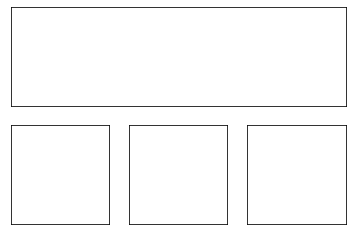

In [7]:
import matplotlib.pyplot as plt
plt.subplot(2, 1, 1); plt.xticks(()); plt.yticks(())
plt.subplot(2, 3, 4); plt.xticks(()); plt.yticks(())
plt.subplot(2, 3, 5); plt.xticks(()); plt.yticks(())
plt.subplot(2, 3, 6); plt.xticks(()); plt.yticks(())

<img src='img/eixopolar.png' alt='Imagem de gráfico com eixo polar.' style='float:right;width:400px'>

### Eixo Polar
A partir do código seguinte, tente reproduzir o gráfico à direita, cuidando dos estilos de linha.  
<u>Dica</u>: Modifique a linha com o comando `axes`.
```python
plt.axes([0, 0, 1, 1]) 
N = 20
ang = np.arange(0., 2*np.pi, 2*np.pi/N)
raio = 10*np.random.rand(N)
larg = np.pi/4*np.random.rand(N)
barras = plt.bar(ang, raio, width=larg, bottom=0.0)
for r, barra in zip(raio, barras):
    barra.set_facecolor(plt.cm.jet(r/10.))
    barra.set_alpha(0.5)
plt.show()
```

<img src='img/graf3d.png' alt='Imagem de gráfico 3D.' style='float:right;width:400px'>

### Gráficos 3D
A partir do código seguinte, tente reproduzir o gráfico à direita, cuidando dos estilos de linha.  
<u>Dica</u>: Use o comando `contourf`.
```python
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='hot')
plt.show()
```

<img src='img/equacoes.png' alt='Imagem de equações matemáticas.' style='float:right;width:400px'>

### Textos
A partir do código seguinte, tente reproduzir o gráfico à direita, cuidando dos estilos de linha.  
<u>Dica</u>: Dê uma olhada no logotipo do **matplotlib**.
```python
eq = (r"$\int_{-\infty}^\infty e^{-x^2}dx = \sqrt{\pi}$")
x,y = np.random.uniform(0, 1, 2)
plt.text(x, y, eq, ha='center', va='center', color="#11557c", alpha=0.35, transform=plt.gca().transAxes, fontsize=18, clip_on=True)
plt.xticks(()); plt.yticks(())
plt.show()
```

<p style="text-align:right;">>>>>> <a href="#topo">Volta ao topo</a>

<a id="5"></a>
## Depois dessa Introdução... 

Tutorial do `Pyplot` - http://matplotlib.org/users/pyplot_tutorial.html 
- Introdução 
- Controlando as propriedades da linha 
- Trabalhando c/ várias figuras/eixos 
- Trabalhando com texto 
 
Tutorial sobre `image` - http://matplotlib.org/users/image_tutorial.html 
- Comandos de inicialização 
- Importando dados de imagem para matrizes Numpy 
- Plotando matrizes Numpy como imagens 

Tutorial sobre `text()` - http://matplotlib.org/users/index_text.html 
- Introdução ao text 
- Comandos text básicos 
- Propriedades de texto e layout 
- Escrevendo expr.s matemáticas 
- Renderização de texto em LaTeX 
- Anotando texto 
 
Tutorial sobre `artist` (artista) - http://matplotlib.org/users/artists.html 
- Introdução 
- Customizando seus objetos 
- Recipientes de objetos 
- Contêiner figure 
- Recipiente axes
- Contêineres axis 
- Contêineres tick
 
Tutorial sobre `path(caminho)` - http://matplotlib.org/users/path_tutorial.html 
- Introdução 
- Exemplo Bézier 
- Caminhos compostos 

Tutorial de transformações - http://matplotlib.org/users/transforms_tutorial.html 
- Introdução 
- Coordenadas de dados 
- Coordenadas dos eixos 
- Transformações homogêneas (_blended_) 
- Usando transformações de deslocamento (_offset_) para criar efeito sombra 
- A transformação tubo (_pipeline_)
 

> Documentação Matplotlib: Guia do Usuário - http://matplotlib.org/users/index.html  
> Documentação para código: use o comando `help(plt.plot)`. 

In [88]:
import matplotlib.pyplot as plt 
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The foll

<p style="text-align:right;">>>>>> <a href="#topo">Volta ao topo</a>

<a id="6"></a>
## Referências Rápidas
<img src='img/proprslinhas.png' alt='Propriedades de linhas.' style='float:right;width:600px'>

### Propriedades de Linha

| Estilos de Linha | Tipos de Marcador |
|:-----------------|:------------------|
|<img src='img/estiloslinha.png' alt='Estilos de linha.' style='float:left;width:350px'>|<img src='img/tiposmarcador.png' alt='Tipos de marcador.' style='float:right;width:350px'>|

### Mapas de Cores
<img src='img/mapascor.png' alt='Mapas de Cores.' style='float:center;width:400px'>

<p style="text-align:right;">>>>>> <a href="#topo">Volta ao topo</a>

<p style="text-align:center;">>>>>> <a href="http:/notebooks/index.ipynb">Volta ao Índice... </a><<<<<